In [11]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import os
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
import h5py as h5

In [12]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [1]:
!wget -O background.h5 https://wolke.physnet.uni-hamburg.de/index.php/s/LxRxH94MTPpjKMX/download
!wget -O signal.h5 https://wolke.physnet.uni-hamburg.de/index.php/s/z96QkTr9oxAeLEi/download

--2024-08-22 19:10:05--  https://wolke.physnet.uni-hamburg.de/index.php/s/LxRxH94MTPpjKMX/download
Resolving wolke.physnet.uni-hamburg.de (wolke.physnet.uni-hamburg.de)... 134.100.106.8
Connecting to wolke.physnet.uni-hamburg.de (wolke.physnet.uni-hamburg.de)|134.100.106.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘background.h5’

background.h5           [         <=>        ] 551.91M  3.04MB/s    in 3m 40s  

2024-08-22 19:13:46 (2.51 MB/s) - ‘background.h5’ saved [578718505]

--2024-08-22 19:13:46--  https://wolke.physnet.uni-hamburg.de/index.php/s/z96QkTr9oxAeLEi/download
Resolving wolke.physnet.uni-hamburg.de (wolke.physnet.uni-hamburg.de)... 134.100.106.8
Connecting to wolke.physnet.uni-hamburg.de (wolke.physnet.uni-hamburg.de)|134.100.106.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘signal.h5’

signal.h5               

In [13]:
def load(file_name):
    """
    Loads data from a file and converts it to the format we'll need for the autoencoder.
    """

    return torch.tensor(h5.File(file_name)["j1_images"]).float()[:, np.newaxis, :, :].to(device)

In [4]:
# Many thanks to Lennart Kämmle
background = load("background.h5")
signal = load("signal.h5")

/tmp/ipykernel_470203/1421158069.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return torch.tensor(h5.File(file_name)["j1_images"]).float()[:, np.newaxis, :, :].to(device)
/tmp/ipykernel_470203/1421158069.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  return torch.tensor(h5.File(file_name)["j1_images"]).float()[:, np.newaxis, :, :].to(device)


In [14]:
print(len(background), len(signal))

253622 88967


In [16]:
import h5py
import numpy as np

# Load the HDF5 file
file_path = 'background.h5'
with h5py.File(file_path, 'r') as h5_file:
    # List all groups in the HDF5 file
    print("Datasets in the file:")
    datasets = list(h5_file.keys())
    print(datasets)

    # Iterate through datasets and inspect them
    for dataset_name in datasets:
        dataset = h5_file[dataset_name]
        print(f"\nDataset: {dataset_name}")
        print(f"Shape: {dataset.shape}")
        print(f"Data type: {dataset.dtype}")
        
        # Show basic statistics instead of raw data
        data_sample = dataset[:5]  # Show the first 5 elements
        print("Sample data:")
        print(data_sample)
        
        # If the data is numerical, show some statistics
        if np.issubdtype(dataset.dtype, np.number):
            print("Statistics:")
            print(f"Mean: {np.mean(dataset):.4f}")
            print(f"Std Dev: {np.std(dataset):.4f}")
            print(f"Min: {np.min(dataset):.4f}")
            print(f"Max: {np.max(dataset):.4f}")


Datasets in the file:
['j1_images', 'jet_kinematics']

Dataset: j1_images
Shape: (253622, 33, 33)
Data type: float16
Sample data:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
Statistics:
Mean: 0.0009
Std Dev: 0.0077
Min: 0.00

In [17]:
import pandas as pd
import h5py

# Load the HDF5 file
file_path = 'background.h5'
with h5py.File(file_path, 'r') as h5_file:
    # Iterate through datasets and inspect them
    for dataset_name in h5_file.keys():
        dataset = h5_file[dataset_name]
        print(f"\nDataset: {dataset_name}")
        print(f"Shape: {dataset.shape}")
        print(f"Data type: {dataset.dtype}")
        
        # Convert the dataset to a Pandas DataFrame for better readability (if it is 2D)
        if len(dataset.shape) == 2:  # Only works for 2D datasets
            df = pd.DataFrame(dataset[:5])  # Show the first 5 rows
            print("Data preview:")
            print(df)
        else:
            # For non-2D data, you can still summarize or show a sample
            print("Sample data:")
            print(dataset[:5])



Dataset: j1_images
Shape: (253622, 33, 33)
Data type: float16
Sample data:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]

Dataset: jet_kinematics
Shape: (253622, 14)
Data type: float64
Data preview:
            0         1   

In [18]:
import h5py
import numpy as np

# Load the HDF5 file
file_path = 'background.h5'
with h5py.File(file_path, 'r') as h5_file:
    # List all groups in the HDF5 file
    print("Datasets in the file:")
    datasets = list(h5_file.keys())
    print(datasets)

    # Iterate through datasets and inspect them
    for dataset_name in datasets:
        dataset = h5_file[dataset_name]
        print(f"\nDataset: {dataset_name}")
        print(f"Shape: {dataset.shape}")
        print(f"Data type: {dataset.dtype}")
        
        # Show formatted sample data (first 5 elements)
        data_sample = dataset[:5]
        print("Sample data (formatted):")
        print(np.array2string(data_sample, precision=4, separator=', '))  # Format the output


Datasets in the file:
['j1_images', 'jet_kinematics']

Dataset: j1_images
Shape: (253622, 33, 33)
Data type: float16
Sample data (formatted):
[[[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.

In [20]:
import h5py
import numpy as np
import pandas as pd

# Load the HDF5 file
file_path = 'background.h5'
with h5py.File(file_path, 'r') as h5_file:
    # Iterate through datasets and inspect them
    for dataset_name in h5_file.keys():
        dataset = h5_file[dataset_name]
        print(f"\nDataset: {dataset_name}")
        print(f"Shape: {dataset.shape}")
        print(f"Data type: {dataset.dtype}")
        
        # Check if the dataset has feature names as an attribute
        if 'feature_names' in dataset.attrs:
            feature_names = dataset.attrs['feature_names']
            print("Feature Names:")
            print(feature_names)
        else:
            print("No feature names found in attributes.")

        # Convert the dataset to a Pandas DataFrame for better readability (if it is 2D)
        if len(dataset.shape) == 2:  # Only works for 2D datasets
            if 'feature_names' in locals():
                df = pd.DataFrame(dataset[:5], columns=feature_names)  # Use feature names as column headers
            else:
                df = pd.DataFrame(dataset[:5])  # Show the first 5 rows without column names if not available
            print("Data preview:")
            print(df)
        else:
            # For non-2D data, you can still summarize or show a sample
            print("Sample data:")
            print(np.array2string(dataset[:5], precision=4, separator=', '))



Dataset: j1_images
Shape: (253622, 33, 33)
Data type: float16
No feature names found in attributes.
Sample data:
[[[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  ...,
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0., 0.]],

 [[0., 0., 0., ..., 0., 0., 0.],
  [0., 0., 0., ..., 0., 0

In [9]:
def plot_jet(jet):
    """
    Plots a jet image and show it.
    """

    from matplotlib import colors

    norm = colors.LogNorm(1e-3, 1, clip='True')

    plt.imshow(jet.cpu(), norm=norm, origin="lower")

    plt.xlabel(r"$i_\eta'$")
    plt.ylabel(r"$i_\phi'$")
    plt.colorbar(label="Energy (normalized to one)")
    plt.show()

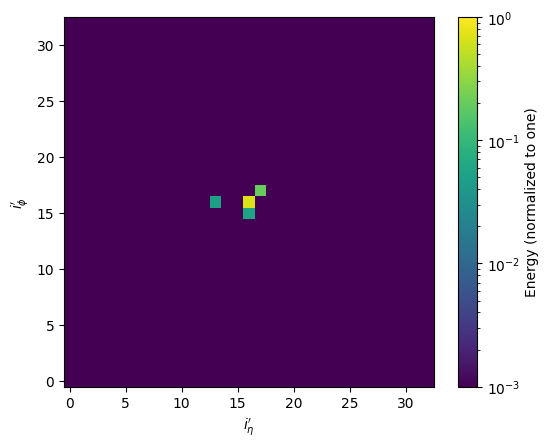

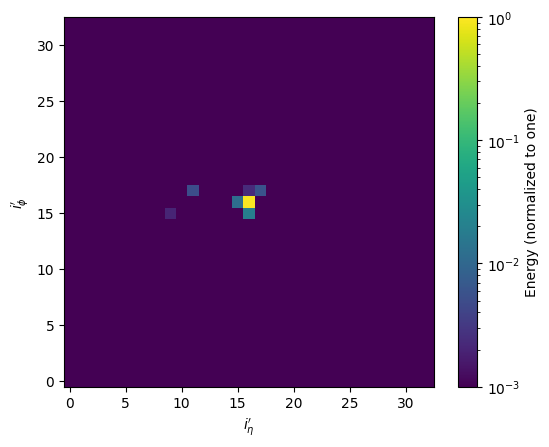

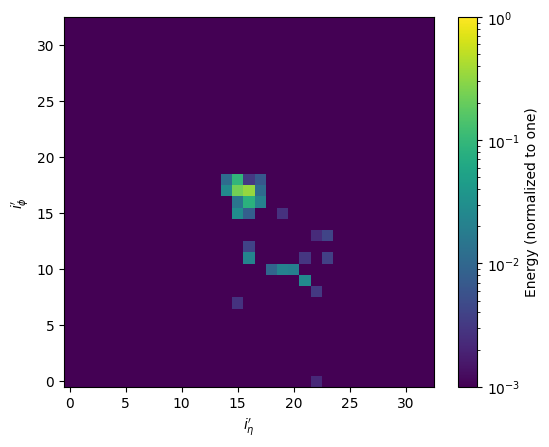

In [10]:
for i in range(3):
    plot_jet(background[i, 0])

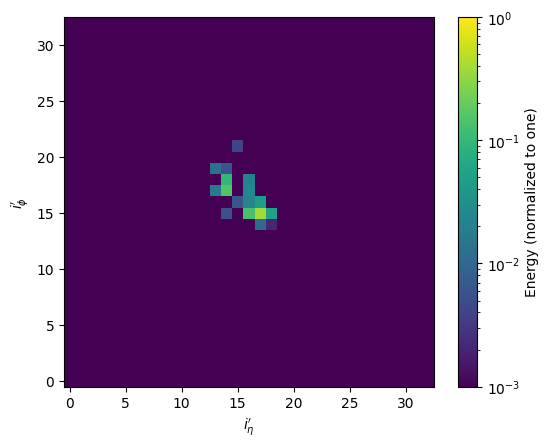

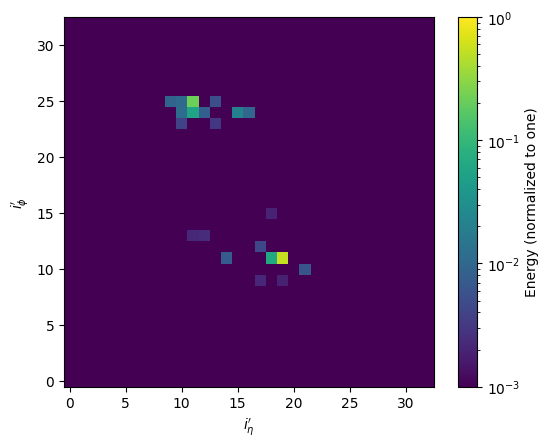

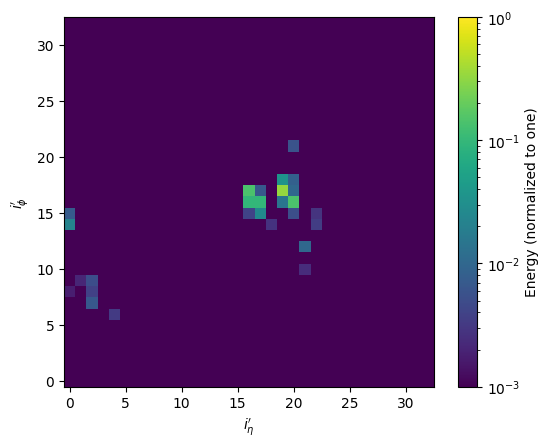

In [11]:
for i in range(3):
    plot_jet(signal[i, 0])

In [6]:
def make_model(latent_space_dims=2, npix=33):
    sample_factor = 3

    # The first half of the network maps the input images to the low-dimensional latent space.
    # The dimension is reduced in steps until we reach the latent space.
    encoder = nn.Sequential(
        # Input has 33*33 dimensions
        nn.Conv2d(1, 5, kernel_size=3, padding=1),
        # 33*33*5 dimensions
        nn.ELU(),
        nn.Conv2d(5, 5, kernel_size=3, padding=1),
        nn.ELU(),
        nn.MaxPool2d(sample_factor),

        # 11*11*5 dimensions

        nn.Conv2d(5, 5, kernel_size=3, padding=1),
        nn.ELU(),
        nn.Conv2d(5, 5, kernel_size=3, padding=1),
        nn.ELU(),
        nn.Conv2d(5, 1, kernel_size=3, padding=1),
        nn.ELU(),

        # 11*11 dimensions

        nn.Flatten(),
        nn.Linear((npix // sample_factor)**2, 100),
        # 100 dimensions
        nn.ReLU(),
        nn.Linear(100, latent_space_dims),
        nn.ReLU())

    # The second half of the network maps the low-dimensional latent space to the original
    # images. Notice how it mirrors the encoder architecture: this is a common choice in practice,
    # though for no specific reason.
    # How many dimensions does the data have after each step?
    decoder = nn.Sequential(
        nn.Linear(latent_space_dims, 100),
        nn.ReLU(),
        nn.Linear(100, (npix // sample_factor)**2),
        nn.ReLU(),

        nn.Unflatten(1, (1, (npix // sample_factor), (npix // sample_factor))),

        nn.Conv2d(1, 5, kernel_size=3, padding=1),
        nn.ELU(),
        nn.Conv2d(5, 5, kernel_size=3, padding=1),
        nn.ELU(),

        nn.Upsample(scale_factor=sample_factor),

        nn.Conv2d(5, 5, kernel_size=3, padding=1),
        nn.ELU(),
        nn.Conv2d(5, 1, kernel_size=3, padding=1),
        nn.ELU())

    # The autoencoder first encodes the images, then tries to decode them.
    return nn.Sequential(encoder, decoder).to(device), encoder.to(device), decoder.to(device)

In [7]:
autoencoder, _, _ = make_model(20)

In [8]:
import torch
import torch.optim as optim

def MSE(truth, decoded):
    """
    Computes the element-wise mean square error between true and decoded images.
    """
    # We average over the last three dimensions, representing the channel, x, and y.
    return ((truth - decoded) ** 2).mean((-1, -2, -3))

def train(autoencoder, data, *, lr=1e-3, epochs=200, batch_size=128, step_size=50, gamma=0.5, save_path='autoencoder.pth', save_interval=10):
    """
    Trains an autoencoder using `data`.
    - lr: Initial learning rate
    - epochs: Number of training epochs
    - batch_size: Size of each training batch
    - step_size: Period of learning rate decay
    - gamma: Multiplicative factor of learning rate decay
    - save_path: File path to save the model
    - save_interval: Interval of epochs to save model checkpoints
    """

    optimizer = optim.Adam(autoencoder.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

    for epoch in range(epochs):
        loss_sum = 0

        for i in range(len(data) // batch_size):
            batch = data[i * batch_size:(i + 1) * batch_size]

            optimizer.zero_grad()
            loss = MSE(batch, autoencoder(batch)).mean()
            loss.backward()
            optimizer.step()

            loss_sum += loss.detach().cpu().item()

        scheduler.step()  # Step the scheduler at the end of each epoch

        print(f"Epoch {epoch:2d}: training loss = {loss_sum}, learning rate = {scheduler.get_last_lr()[0]:.6f}")

         # Save the model at specified intervals
        if (epoch + 1) % save_interval == 0:
            checkpoint_path = f"{os.path.splitext(save_path)[0]}_epoch_{epoch+1}.pth"
            torch.save(autoencoder.state_dict(), checkpoint_path)
            print(f"Model checkpoint saved at {checkpoint_path}")

    # Save the final model
    torch.save(autoencoder.state_dict(), save_path)
    print(f"Final model saved at {save_path}")


In [9]:
train(autoencoder, background[:12800])

Epoch  0: training loss = 0.15086946313385852, learning rate = 0.001000
Epoch  1: training loss = 0.04423299207701348, learning rate = 0.001000
Epoch  2: training loss = 0.0374886303616222, learning rate = 0.001000
Epoch  3: training loss = 0.03444411730743013, learning rate = 0.001000
Epoch  4: training loss = 0.030923647165764123, learning rate = 0.001000
Epoch  5: training loss = 0.028730791207635775, learning rate = 0.001000
Epoch  6: training loss = 0.02683017418894451, learning rate = 0.001000
Epoch  7: training loss = 0.025255998130887747, learning rate = 0.001000
Epoch  8: training loss = 0.023935977602377534, learning rate = 0.001000
Epoch  9: training loss = 0.02264022392046172, learning rate = 0.001000
Epoch 10: training loss = 0.021331334122805856, learning rate = 0.001000
Epoch 11: training loss = 0.02012077224208042, learning rate = 0.001000
Epoch 12: training loss = 0.01922807694063522, learning rate = 0.001000
Epoch 13: training loss = 0.018605162447784096, learning rat

/tmp/ipykernel_470203/3821025098.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  background_chunk = torch.tensor(background[i:i + chunk_size], dtype=torch.float32).to(device)
/tmp/ipykernel_470203/3821025098.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  background_sample_flat = torch.tensor(background_sample_flat, dtype=torch.float32).cpu().numpy()
/home/hero/miniconda3/envs/pytorch_cuda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hero/miniconda3/envs/pytorch_cuda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The defa

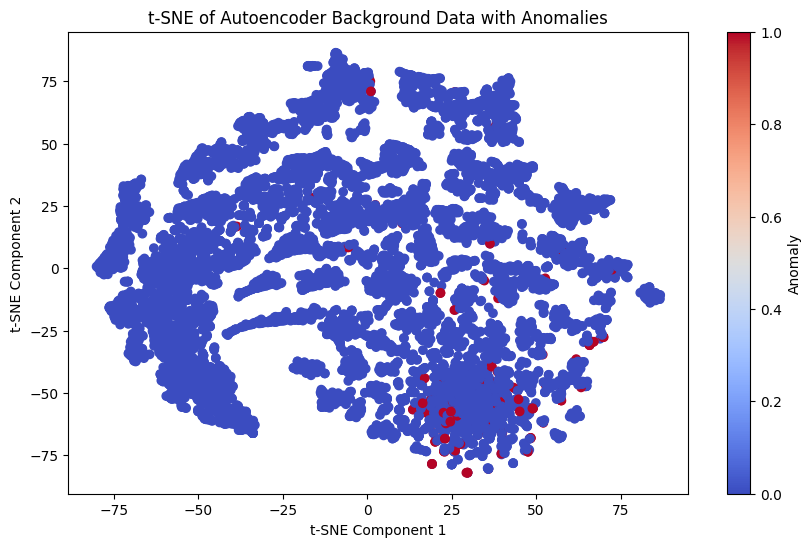

In [10]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
autoencoder.eval()
with torch.no_grad():
    # Process the background data in smaller chunks to avoid memory issues
    chunk_size = 1024  # Adjust chunk size as needed
    reconstruction_errors = []
    for i in range(0, len(background), chunk_size):
        background_chunk = torch.tensor(background[i:i + chunk_size], dtype=torch.float32).to(device)
        reconstruction = autoencoder(background_chunk)
        reconstruction_error = torch.mean((reconstruction - background_chunk) ** 2, dim=[1, 2, 3])
        reconstruction_errors.append(reconstruction_error.cpu())  # Move to CPU

    # Concatenate all reconstruction errors
    reconstruction_errors = torch.cat(reconstruction_errors)

# Step 3: Define k and calculate threshold for anomaly detection
k = 3  # You can experiment with different values of k
threshold = torch.mean(reconstruction_errors) + k * torch.std(reconstruction_errors)
anomalies = reconstruction_errors > threshold

# Step 4: Apply t-SNE on a downsampled or smaller portion of the background data
tsne_sample_size = min(10000, len(background))  # Adjust the sample size as needed
background_sample = background[:tsne_sample_size]
tsne = TSNE(n_components=2)

# Ensure the data is on CPU and in NumPy format for t-SNE
background_sample_flat = background_sample.reshape(len(background_sample), -1)
background_sample_flat = torch.tensor(background_sample_flat, dtype=torch.float32).cpu().numpy()

background_tsne = tsne.fit_transform(background_sample_flat)

# Step 5: Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(background_tsne[:, 0], background_tsne[:, 1], 
            c=anomalies[:tsne_sample_size].cpu().numpy(), cmap='coolwarm')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Autoencoder Background Data with Anomalies')
plt.colorbar(label='Anomaly')
plt.show()


In [20]:
@torch.no_grad()
def plot_jet_reconstruction(autoencoder, jet):
    """
    Plots a jet image and its reconstruction by an autoencoder, and show both.
    """

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

    norm = colors.LogNorm(1e-3, 1, clip='True')

    plt.sca(ax1)
    plt.imshow(jet[0, 0].cpu(), norm=norm, origin="lower")
    plt.title("Original")
    plt.ylabel(r"$i_\phi'$")
    plt.xlabel(r"$i_\eta'$")

    plt.sca(ax2)
    plt.imshow(autoencoder(jet)[0, 0].cpu(), norm=norm, origin="lower")
    plt.title("AE Output")
    plt.xlabel(r"$i_\eta'$")

    plt.sca(ax3)
    plt.imshow((jet - autoencoder(jet)).abs()[0, 0].cpu(), norm=norm, origin="lower")
    plt.title("Absolute Difference")
    plt.xlabel(r"$i_\eta'$")

    plt.show()

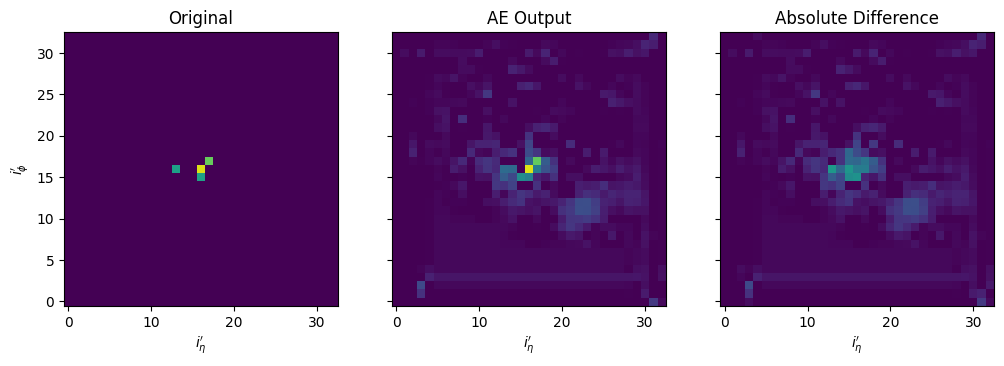

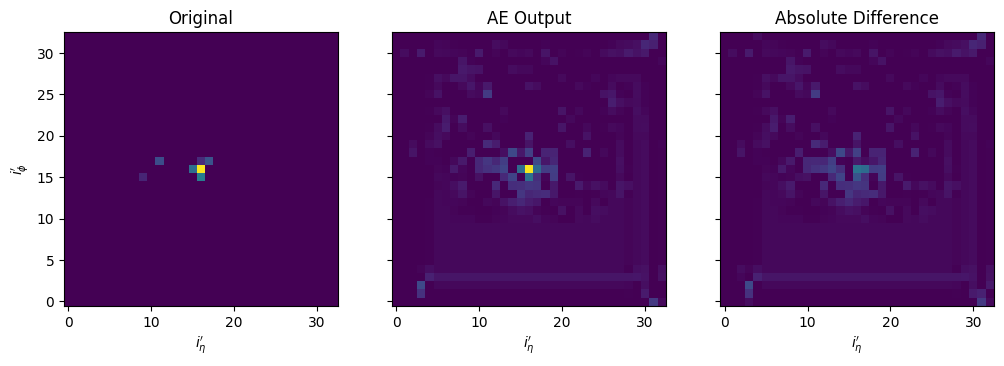

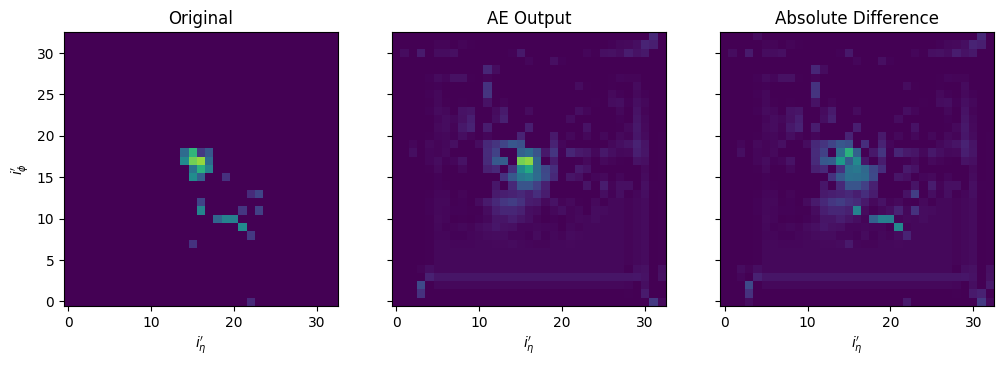

In [21]:
for i in range(3):
    plot_jet_reconstruction(autoencoder, background[i:i + 1, 0:1])

In [22]:
# Step 2: Evaluate the autoencoder on the entire background data
autoencoder.eval()
with torch.no_grad():
    background_tensor = torch.tensor(background, dtype=torch.float32).to(device)
    reconstruction = autoencoder(background_tensor)
    reconstruction_error = torch.mean((reconstruction - background_tensor) ** 2, dim=[1, 2, 3])

# Step 3: Define k and calculate threshold for anomaly detection
k = 3  # You can experiment with different values of k
threshold = torch.mean(reconstruction_error) + k * torch.std(reconstruction_error)
anomalies = reconstruction_error > threshold


# Step 4: Apply t-SNE on the background data
tsne = TSNE(n_components=2)
background_tsne = tsne.fit_transform(background.reshape(len(background), -1))  # Flatten the data for t-SNE

# Step 5: Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(background_tsne[:, 0], background_tsne[:, 1], c=anomalies.cpu().numpy(), cmap='coolwarm')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Autoencoder Background Data with Anomalies')
plt.colorbar(label='Anomaly')
plt.show()


/tmp/ipykernel_2102160/1066783520.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  background_tensor = torch.tensor(background, dtype=torch.float32).to(device)


RuntimeError: CUDA out of memory. Tried to allocate 5.14 GiB (GPU 0; 5.92 GiB total capacity; 4.48 GiB already allocated; 155.38 MiB free; 5.15 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [22]:
@torch.no_grad()
def autoencoder_roc(autoencoder, signal, background):
    """
    Wrapper around sklearn.metric.roc_curve to compute performance metrics of an autoencoder.
    """

    # Cap background size to avoid running out of CUDA memory. Take it from the end to reduce overlap
    # with the training set.
    background = background[:-2 * len(signal)]

    signal_score = MSE(signal, autoencoder(signal)).cpu()
    background_score = MSE(background, autoencoder(background)).cpu()

    ones = torch.ones(len(signal))
    zeros = torch.zeros(len(background))

    return roc_curve(torch.concat((ones, zeros)), torch.concat((signal_score, background_score)))


def plot_performance(autoencoder, signal, background):
    """
    Plots autoencoder anomaly detection performance metrics.
    """

    fpr, tpr, thr = autoencoder_roc(autoencoder, signal, background)

    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ax[0].plot(tpr, 1/fpr, label="Autoencoder")
    ax[0].plot(tpr, 1/tpr, linestyle=":", color="black", label="random")
    ax[0].set_xlabel("Signal Efficiency (True Postive Rate)")
    ax[0].set_ylabel("Background Rejection (1 / False Positive Rate)")
    ax[0].set_yscale("log")

    ax[1].plot(tpr, tpr/(fpr**0.5), label="Autoencoder")
    ax[1].plot(tpr, tpr**0.5, linestyle=":", color="black", label="random")
    ax[1].set_xlabel("Signal Efficiency (True Postive Rate)")
    ax[1].set_ylabel("Significance Improvement")
    ax[1].legend(loc="upper right")

    plt.show()

/tmp/ipykernel_1660716/3387739281.py:28: RuntimeWarning: divide by zero encountered in true_divide
  ax[0].plot(tpr, 1/fpr, label="Autoencoder")
/tmp/ipykernel_1660716/3387739281.py:29: RuntimeWarning: divide by zero encountered in true_divide
  ax[0].plot(tpr, 1/tpr, linestyle=":", color="black", label="random")
/tmp/ipykernel_1660716/3387739281.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ax[1].plot(tpr, tpr/(fpr**0.5), label="Autoencoder")
/tmp/ipykernel_1660716/3387739281.py:34: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(tpr, tpr/(fpr**0.5), label="Autoencoder")


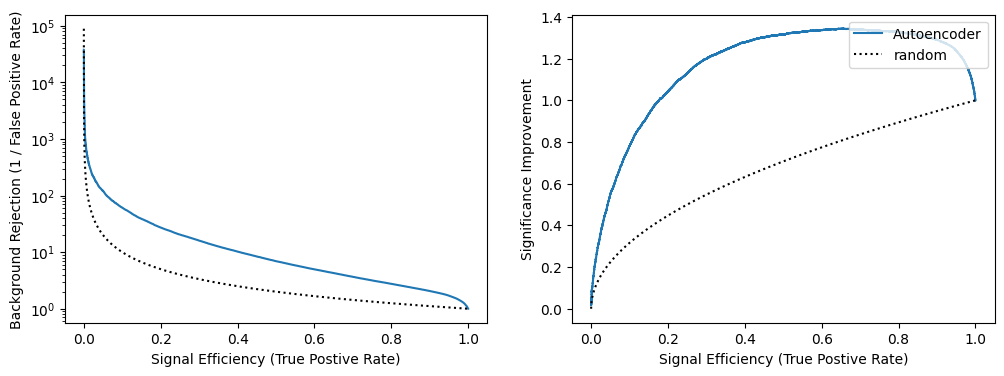

In [23]:
# We use the full signal and background so the plot is not limited by statistics.
# The training set is tiny compared to the rest so we do not exclude it (in a real application we would).
plot_performance(autoencoder, signal, background)

In [24]:
def mix(size, background, signal, signal_fraction):
    """
    Mixes signal and background into a tensor of the specified size, such that fraction of signal events is as specified.
    """

    num_signal = int(size * signal_fraction)
    num_background = size - num_signal
    data = torch.concat((background[:num_background], signal[:num_signal]))
    truth = torch.concat((torch.zeros_like(background[:num_background]), torch.ones_like(signal[:num_signal])))
    perm = torch.randperm(len(data))
    return data[perm], truth[perm]

In [28]:
autoencode= {}

In [25]:
mixed_data, _ = mix(12800, background, signal, 0.0)
mixed_autoencoder, _, _ = make_model(20)
train(mixed_autoencoder, mixed_data, epochs=200)


Epoch  0: training loss = 0.06777336829691194
Epoch  1: training loss = 0.0374628440476954
Epoch  2: training loss = 0.03446040244307369
Epoch  3: training loss = 0.033346546842949465
Epoch  4: training loss = 0.03229010620270856
Epoch  5: training loss = 0.02859268728934694
Epoch  6: training loss = 0.026321720477426425
Epoch  7: training loss = 0.024866243184078485
Epoch  8: training loss = 0.023886905459221452
Epoch  9: training loss = 0.023061810919898562
Epoch 10: training loss = 0.02232385319075547
Epoch 11: training loss = 0.0216207053308608
Epoch 12: training loss = 0.02090689307078719
Epoch 13: training loss = 0.020237528282450512
Epoch 14: training loss = 0.019549618125893176
Epoch 15: training loss = 0.018635960077517666
Epoch 16: training loss = 0.01774479023879394
Epoch 17: training loss = 0.017127162383985706
Epoch 18: training loss = 0.0167173132795142
Epoch 19: training loss = 0.01641073715290986
Epoch 20: training loss = 0.016140812018420547
Epoch 21: training loss = 0

RuntimeError: CUDA out of memory. Tried to allocate 1.80 GiB (GPU 0; 5.92 GiB total capacity; 3.25 GiB already allocated; 305.38 MiB free; 5.00 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [30]:
import torch
torch.cuda.empty_cache()


In [43]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'garbage_collection_threshold:0.6,max_split_size_mb:8000'

In [39]:
mixed_autoencoder.to('cuda:0')

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ELU(alpha=1.0)
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ELU(alpha=1.0)
    (7): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ELU(alpha=1.0)
    (9): Conv2d(5, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ELU(alpha=1.0)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=121, out_features=100, bias=True)
    (13): ReLU()
    (14): Linear(in_features=100, out_features=20, bias=True)
    (15): ReLU()
  )
  (1): Sequential(
    (0): Linear(in_features=20, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=121, bias=True)
    (3): ReLU()
    (4): Unflatten(

In [44]:
with torch.no_grad():
    plot_performance(mixed_autoencoder, signal, background)

RuntimeError: CUDA out of memory. Tried to allocate 1.80 GiB (GPU 0; 5.92 GiB total capacity; 3.25 GiB already allocated; 305.38 MiB free; 5.00 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [13]:
# Detect anomalies after training
autoencoder.eval()
with torch.no_grad():
    val_tensor = torch.tensor(background, dtype=torch.float32)
    reconstruction = autoencoder(val_tensor)
    reconstruction_error = torch.mean((reconstruction - val_tensor)**2, dim=[1, 2, 3])  # Mean over channel, x, y

# Calculate threshold for anomalies
threshold = torch.mean(reconstruction_error) + k * torch.std(reconstruction_error)
anomalies = reconstruction_error > threshold

# Visualize anomalies using t-SNE
tsne = TSNE(n_components=2)
val_tsne = tsne.fit_transform(data.reshape(len(data), -1))  # Flatten the data

plt.figure(figsize=(10, 6))
plt.scatter(val_tsne[:, 0], val_tsne[:, 1], c=anomalies.cpu().numpy(), cmap='coolwarm')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Data with Anomalies')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = autoencoder_roc(autoencoder, signal, background)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

return anomalies, fpr, tpr, roc_auc

/tmp/ipykernel_2102160/4062258379.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_tensor = torch.tensor(background, dtype=torch.float32)


RuntimeError: CUDA out of memory. Tried to allocate 5.14 GiB (GPU 0; 5.92 GiB total capacity; 3.45 GiB already allocated; 1.85 GiB free; 3.45 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF